<a href="https://colab.research.google.com/github/anaidg/EACD-01-FUNDAMENTOS/blob/master/Proyecto_Gestion_Cartera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('/content/drive/Shareddrives/Monografia/dataset_esp.txt', delimiter = "\t")

In [ ]:
df

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,Estado_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,Fecha_Inicio_Cobertura,ultimo_dia_mes,Nro_afiliados,Fecha_Limite_Pago,fecha_real_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,202002,45,20,21,5347,EN COBERTURA,0,1,431,1,2015/07/07,2020/02/29,1.0,2020/03/17,2020/03/17,877803.00,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,202006,45,20,21,5347,EN COBERTURA,0,1,235,2,2018/01/26,2020/06/30,1.0,2020/07/02,2020/07/02,1850000.00,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,202005,16,40,41,5347,EN COBERTURA,0,1,50,3,2019/10/04,2020/05/31,1.0,2020/06/12,2020/06/08,877803.00,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,202006,34,40,41,5347,EN MORA,0,1,236,5,2016/09/13,2020/06/30,1.0,2020/07/13,2020/07/09,2600000.00,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,202004,35,30,31,5347,EN MORA,0,1,236,1,2013/02/21,2020/04/30,1.0,2020/05/08,2020/05/15,1000000.00,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057792,217798798,202004,11,30,31,5347,EN MORA,0,4,103299,3,2017/03/01,2020/04/30,16.0,2020/05/12,2020/05/04,877803.00,3511212,30.0,30.0,4,85600.0,85600.0,3511212.0,3511212.0,0.0,2.436,2.436,162000.0,162000.0,1
1057793,217908019,202004,45,20,21,5347,EN COBERTURA,0,2,521963,2,2017/09/15,2020/04/30,4.0,2020/05/08,2020/05/06,1051581.50,2103164,24.5,24.5,2,18700.0,9400.0,1781302.0,1781302.0,-9300.0,1.044,0.522,0.0,0.0,0
1057794,218346934,202002,49,50,51,5346,EN COBERTURA,0,4,235,2,2019/05/01,2020/02/29,16.0,2020/03/13,2020/03/20,1072410.25,4289641,30.0,30.0,4,44900.0,22500.0,4289641.0,4289641.0,-22400.0,1.044,0.522,43400.0,0.0,1
1057795,218302244,202002,45,20,21,5346,EN COBERTURA,0,2,341,1,2019/01/31,2020/02/29,4.0,2020/03/19,2020/03/13,877803.00,1755606,30.0,30.0,2,9200.0,9200.0,1755606.0,1755606.0,0.0,0.522,0.522,0.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057797 entries, 0 to 1057796
Data columns (total 31 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1057797 non-null  int64  
 1   Mes_Id                      1057797 non-null  int64  
 2   Uen_Arp_Id                  1057797 non-null  int64  
 3   Regional_Arp_Id             1057797 non-null  int64  
 4   Oficina_Arp_Id              1057797 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1057797 non-null  int64  
 6   Estado_Empresa_Arp_Id       1057797 non-null  object 
 7   cant_siniestros             1057797 non-null  int64  
 8   cant_novedades              1057797 non-null  int64  
 9   Sector_Economico_Id         1057797 non-null  int64  
 10  clasificacion_riesgo        1057797 non-null  int64  
 11  Fecha_Inicio_Cobertura      1057797 non-null  object 
 12  ultimo_dia_mes              1057797 non-null  object 
 1

In [ ]:
# Cambiar a formato fecha, crear una nueva columna con la diferencia en días entre el último día del mes y la inicial de la cobertura, y eliminar estas dos últimas variables.

import datetime

list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['Fecha_Inicio_Cobertura']))
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['ultimo_dia_mes']))

df[['Fecha_Inicio_Cobertura','ultimo_dia_mes']] = df[['Fecha_Inicio_Cobertura','ultimo_dia_mes']].apply(pd.to_datetime)
new_col = (df['ultimo_dia_mes'] - df['Fecha_Inicio_Cobertura']).dt.days
df.insert(11, 'cant_dias_cobertura', new_col)

df = df.drop('Fecha_Inicio_Cobertura', axis = 1)
df = df.drop('ultimo_dia_mes', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057797 entries, 0 to 1057796
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1057797 non-null  int64  
 1   Mes_Id                      1057797 non-null  int64  
 2   Uen_Arp_Id                  1057797 non-null  int64  
 3   Regional_Arp_Id             1057797 non-null  int64  
 4   Oficina_Arp_Id              1057797 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1057797 non-null  int64  
 6   Estado_Empresa_Arp_Id       1057797 non-null  object 
 7   cant_siniestros             1057797 non-null  int64  
 8   cant_novedades              1057797 non-null  int64  
 9   Sector_Economico_Id         1057797 non-null  int64  
 10  clasificacion_riesgo        1057797 non-null  int64  
 11  cant_dias_cobertura         1057797 non-null  int64  
 12  Nro_afiliados               1057797 non-null  float64
 1

In [ ]:
# Verificar si existe algún ? en la columna 'Fecha_Limite_Pago'

ind1= df[df['Fecha_Limite_Pago'] == '?'].index
ind1

Int64Index([], dtype='int64')

In [ ]:
# Verificar si existe algún ? en la columna 'fecha_real_pago'

ind2 = df[df['fecha_real_pago'] == '?'].index
ind2

Int64Index([      9,      11,      14,      42,      56,      83,      92,
                 97,     105,     108,
            ...
            1057634, 1057647, 1057659, 1057662, 1057674, 1057681, 1057691,
            1057734, 1057745, 1057746],
           dtype='int64', length=56545)

In [ ]:
# Eliminar valores "faltantes" en la columna 'fecha_real_pago'(para la línea base).

df.drop(ind2, inplace=True)

In [ ]:
# Cambiar a formato fecha, crear una nueva columna con la diferencia en días entre la fecha real y la fecha límite de pago, y eliminar estas dos últimas variables.

list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['Fecha_Limite_Pago']))
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['fecha_real_pago'])) # Hay al menos un ? en esta col

df[['Fecha_Limite_Pago','fecha_real_pago']] = df[['Fecha_Limite_Pago','fecha_real_pago']].apply(pd.to_datetime)
new_col = (df['fecha_real_pago'] - df['Fecha_Limite_Pago']).dt.days
df.insert(13, 'cant_dias_pago', new_col)

df = df.drop('Fecha_Limite_Pago', axis = 1)
df = df.drop('fecha_real_pago', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001252 entries, 0 to 1057796
Data columns (total 29 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1001252 non-null  int64  
 1   Mes_Id                      1001252 non-null  int64  
 2   Uen_Arp_Id                  1001252 non-null  int64  
 3   Regional_Arp_Id             1001252 non-null  int64  
 4   Oficina_Arp_Id              1001252 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1001252 non-null  int64  
 6   Estado_Empresa_Arp_Id       1001252 non-null  object 
 7   cant_siniestros             1001252 non-null  int64  
 8   cant_novedades              1001252 non-null  int64  
 9   Sector_Economico_Id         1001252 non-null  int64  
 10  clasificacion_riesgo        1001252 non-null  int64  
 11  cant_dias_cobertura         1001252 non-null  int64  
 12  Nro_afiliados               1001252 non-null  float64
 1

In [ ]:
df

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,Estado_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,202002,45,20,21,5347,EN COBERTURA,0,1,431,1,1698,1.0,0,877803.00,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,202006,45,20,21,5347,EN COBERTURA,0,1,235,2,886,1.0,0,1850000.00,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,202005,16,40,41,5347,EN COBERTURA,0,1,50,3,240,1.0,-4,877803.00,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,202006,34,40,41,5347,EN MORA,0,1,236,5,1386,1.0,-4,2600000.00,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,202004,35,30,31,5347,EN MORA,0,1,236,1,2625,1.0,7,1000000.00,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057792,217798798,202004,11,30,31,5347,EN MORA,0,4,103299,3,1156,16.0,-8,877803.00,3511212,30.0,30.0,4,85600.0,85600.0,3511212.0,3511212.0,0.0,2.436,2.436,162000.0,162000.0,1
1057793,217908019,202004,45,20,21,5347,EN COBERTURA,0,2,521963,2,958,4.0,-2,1051581.50,2103164,24.5,24.5,2,18700.0,9400.0,1781302.0,1781302.0,-9300.0,1.044,0.522,0.0,0.0,0
1057794,218346934,202002,49,50,51,5346,EN COBERTURA,0,4,235,2,304,16.0,7,1072410.25,4289641,30.0,30.0,4,44900.0,22500.0,4289641.0,4289641.0,-22400.0,1.044,0.522,43400.0,0.0,1
1057795,218302244,202002,45,20,21,5346,EN COBERTURA,0,2,341,1,394,4.0,-6,877803.00,1755606,30.0,30.0,2,9200.0,9200.0,1755606.0,1755606.0,0.0,0.522,0.522,0.0,0.0,0


In [ ]:
df.describe()

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
count,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06
mean,2.179925e+08,2.020035e+05,3.938780e+01,3.653640e+01,3.775126e+01,5.346334e+03,1.215558e-01,6.322652e+01,3.327150e+04,2.154709e+00,1.281972e+03,4.704437e+04,9.925194e+00,1.277054e+06,3.743654e+07,2.725197e+01,2.718431e+01,6.341927e+01,1.901134e+06,1.886419e+06,1.060896e+08,1.055060e+08,-1.471546e+04,2.002402e+00,1.931280e+00,2.901446e+04,2.798588e+04,1.825125e-01
std,3.195440e+05,1.709122e+00,1.179618e+01,1.239759e+01,1.268289e+01,1.321357e+00,1.927471e+00,1.506547e+03,9.521186e+04,1.452627e+00,1.318106e+03,4.640614e+06,4.097474e+01,1.295670e+06,5.027258e+08,5.583855e+00,5.953432e+00,1.510666e+03,4.172243e+07,4.174612e+07,3.200896e+09,3.198449e+09,9.285226e+05,2.083863e+00,2.045954e+00,4.362698e+05,4.093521e+05,3.862665e-01
min,2.174568e+08,2.020010e+05,1.000000e+00,2.000000e+01,2.100000e+01,5.343000e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-1.830000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.657040e+08,5.201907e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.177049e+08,2.020020e+05,3.400000e+01,2.000000e+01,2.100000e+01,5.346000e+03,0.000000e+00,1.000000e+00,1.930000e+02,1.000000e+00,4.350000e+02,1.000000e+00,-4.000000e+00,8.778030e+05,1.024111e+06,2.700000e+01,2.708738e+01,1.000000e+00,9.200000e+03,9.200000e+03,9.540000e+05,8.990000e+05,0.000000e+00,5.220000e-01,5.220000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.179124e+08,2.020030e+05,3.500000e+01,4.000000e+01,4.100000e+01,5.347000e+03,0.000000e+00,3.000000e+00,2.360000e+02,1.000000e+00,9.270000e+02,9.000000e+00,0.000000e+00,8.778030e+05,3.180771e+06,3.000000e+01,3.000000e+01,3.000000e+00,3.980000e+04,3.820000e+04,2.838230e+06,2.664769e+06,0.000000e+00,1.044000e+00,9.396000e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.183063e+08,2.020050e+05,4.500000e+01,4.000000e+01,4.100000e+01,5.347000e+03,0.000000e+00,9.000000e+00,3.410000e+02,3.000000e+00,1.600000e+03,8.100000e+01,8.000000e+00,1.182242e+06,1.075583e+07,3.000000e+01,3.000000e+01,9.000000e+00,1.936000e+05,1.873000e+05,9.855606e+06,9.570122e+06,0.000000e+00,2.436000e+00,2.436000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.185126e+08,2.020060e+05,5.900000e+01,6.000000e+01,6.200000e+01,5.347000e+03,4.860000e+02,3.115760e+05,5.219630e+05,5.000000e+00,9.222000e+03,1.546746e+09,4.340000e+02,8.371905e+07,1.782963e+11,4.500000e+01,9.000000e+01,3.124720e+05,1.194490e+10,1.208371e+10,1.364237e+12,1.364313e+12,2.760416e+08,6.960000e+00,7.733333e+00,1.232977e+08,1.232977e+08,1.000000e+00


In [ ]:
df.corr()

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
id,1.000000,-0.002401,0.075101,0.023578,0.024369,0.117983,-0.035554,-0.035358,-0.011889,0.008146,-0.768889,-0.011943,0.010414,-0.092199,-0.058069,0.000214,0.006579,-0.035341,-0.041280,-0.041188,-0.032902,-0.032859,0.003073,0.017807,0.017978,0.005597,0.004022,0.062706
Mes_Id,-0.002401,1.000000,-0.000929,-0.000837,-0.000853,-0.002844,-0.001266,-0.001442,0.000510,-0.001035,0.041423,-0.000591,-0.038288,0.012608,-0.001790,0.041321,0.021502,-0.001469,-0.002953,-0.003039,-0.000890,-0.000937,-0.003918,-0.005893,-0.016329,0.008004,0.012331,0.034773
Uen_Arp_Id,0.075101,-0.000929,1.000000,0.242514,0.259035,0.118999,-0.083027,-0.066846,-0.025241,-0.085701,-0.108713,-0.022326,-0.044583,-0.111562,-0.106972,0.039047,0.040128,-0.066849,-0.079094,-0.078857,-0.060104,-0.060038,0.008628,-0.084169,-0.077908,-0.011172,-0.011552,0.015585
Regional_Arp_Id,0.023578,-0.000837,0.242514,1.000000,0.999332,-0.003734,-0.004181,-0.007377,0.003683,0.083490,-0.036763,-0.004771,0.038042,-0.006773,-0.009753,-0.006436,-0.021427,-0.007368,-0.006761,-0.006848,-0.008470,-0.008531,-0.004076,0.080602,0.072538,0.017498,0.018132,0.056452
Oficina_Arp_Id,0.024369,-0.000853,0.259035,0.999332,1.000000,-0.004115,-0.004228,-0.007461,0.002603,0.084011,-0.037580,-0.004786,0.037881,-0.009142,-0.009941,-0.006847,-0.021623,-0.007452,-0.006926,-0.007013,-0.008569,-0.008629,-0.004092,0.080971,0.073113,0.017380,0.017997,0.055760
Tamano_Empresa_Arp_Id,0.117983,-0.002844,0.118999,-0.003734,-0.004115,1.000000,-0.069083,-0.043512,-0.019557,-0.144625,-0.165595,-0.010268,-0.120044,-0.071022,-0.078815,0.162518,0.156443,-0.043527,-0.048279,-0.047857,-0.034715,-0.034547,0.017743,-0.144391,-0.133225,-0.035652,-0.037313,0.099769
cant_siniestros,-0.035554,-0.001266,-0.083027,-0.004181,-0.004228,-0.069083,1.000000,0.531117,-0.008364,0.027185,0.066130,0.361224,0.076919,0.010622,0.472775,-0.016712,-0.015412,0.531702,0.511021,0.508589,0.396568,0.396005,-0.096288,0.020571,0.021106,0.005991,0.007549,-0.018061
cant_novedades,-0.035358,-0.001442,-0.066846,-0.007377,-0.007461,-0.043512,0.531117,1.000000,0.006500,0.005476,0.074812,0.843042,0.085078,0.014640,0.770886,-0.015175,-0.014044,0.999980,0.751977,0.749328,0.801164,0.800475,-0.099898,-0.000250,-0.000615,0.003188,0.003418,-0.010002
Sector_Economico_Id,-0.011889,0.000510,-0.025241,0.003683,0.002603,-0.019557,-0.008364,0.006500,1.000000,0.011324,0.001417,0.006411,-0.000950,0.104970,0.013849,0.015623,0.014436,0.006468,0.002378,0.002420,0.009557,0.009555,0.001945,0.015077,0.015252,-0.001196,-0.001222,-0.011513
clasificacion_riesgo,0.008146,-0.001035,-0.085701,0.083490,0.084011,-0.144625,0.027185,0.005476,0.011324,1.000000,-0.013883,-0.001399,0.065213,-0.027947,0.011848,-0.189112,-0.193832,0.005495,0.026504,0.026200,0.002797,0.002757,-0.012990,0.797732,0.732906,0.076917,0.078946,0.016615


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
id,1.0000,-0.0024,0.0751,0.0236,0.0244,0.1180,-0.0356,-0.0354,-0.0119,0.0081,-0.7689,-0.0119,0.0104,-0.0922,-0.0581,0.0002,0.0066,-0.0353,-0.0413,-0.0412,-0.0329,-0.0329,0.0031,0.0178,0.0180,0.0056,0.0040,0.0627
Mes_Id,-0.0024,1.0000,-0.0009,-0.0008,-0.0009,-0.0028,-0.0013,-0.0014,0.0005,-0.0010,0.0414,-0.0006,-0.0383,0.0126,-0.0018,0.0413,0.0215,-0.0015,-0.0030,-0.0030,-0.0009,-0.0009,-0.0039,-0.0059,-0.0163,0.0080,0.0123,0.0348
Uen_Arp_Id,0.0751,-0.0009,1.0000,0.2425,0.2590,0.1190,-0.0830,-0.0668,-0.0252,-0.0857,-0.1087,-0.0223,-0.0446,-0.1116,-0.1070,0.0390,0.0401,-0.0668,-0.0791,-0.0789,-0.0601,-0.0600,0.0086,-0.0842,-0.0779,-0.0112,-0.0116,0.0156
Regional_Arp_Id,0.0236,-0.0008,0.2425,1.0000,0.9993,-0.0037,-0.0042,-0.0074,0.0037,0.0835,-0.0368,-0.0048,0.0380,-0.0068,-0.0098,-0.0064,-0.0214,-0.0074,-0.0068,-0.0068,-0.0085,-0.0085,-0.0041,0.0806,0.0725,0.0175,0.0181,0.0565
Oficina_Arp_Id,0.0244,-0.0009,0.2590,0.9993,1.0000,-0.0041,-0.0042,-0.0075,0.0026,0.0840,-0.0376,-0.0048,0.0379,-0.0091,-0.0099,-0.0068,-0.0216,-0.0075,-0.0069,-0.0070,-0.0086,-0.0086,-0.0041,0.0810,0.0731,0.0174,0.0180,0.0558
Tamano_Empresa_Arp_Id,0.1180,-0.0028,0.1190,-0.0037,-0.0041,1.0000,-0.0691,-0.0435,-0.0196,-0.1446,-0.1656,-0.0103,-0.1200,-0.0710,-0.0788,0.1625,0.1564,-0.0435,-0.0483,-0.0479,-0.0347,-0.0345,0.0177,-0.1444,-0.1332,-0.0357,-0.0373,0.0998
cant_siniestros,-0.0356,-0.0013,-0.0830,-0.0042,-0.0042,-0.0691,1.0000,0.5311,-0.0084,0.0272,0.0661,0.3612,0.0769,0.0106,0.4728,-0.0167,-0.0154,0.5317,0.5110,0.5086,0.3966,0.3960,-0.0963,0.0206,0.0211,0.0060,0.0075,-0.0181
cant_novedades,-0.0354,-0.0014,-0.0668,-0.0074,-0.0075,-0.0435,0.5311,1.0000,0.0065,0.0055,0.0748,0.8430,0.0851,0.0146,0.7709,-0.0152,-0.0140,1.0000,0.7520,0.7493,0.8012,0.8005,-0.0999,-0.0003,-0.0006,0.0032,0.0034,-0.0100
Sector_Economico_Id,-0.0119,0.0005,-0.0252,0.0037,0.0026,-0.0196,-0.0084,0.0065,1.0000,0.0113,0.0014,0.0064,-0.0009,0.1050,0.0138,0.0156,0.0144,0.0065,0.0024,0.0024,0.0096,0.0096,0.0019,0.0151,0.0153,-0.0012,-0.0012,-0.0115
clasificacion_riesgo,0.0081,-0.0010,-0.0857,0.0835,0.0840,-0.1446,0.0272,0.0055,0.0113,1.0000,-0.0139,-0.0014,0.0652,-0.0279,0.0118,-0.1891,-0.1938,0.0055,0.0265,0.0262,0.0028,0.0028,-0.0130,0.7977,0.7329,0.0769,0.0789,0.0166


In [ ]:
dg = df.groupby(['Mes_Id'])['id'].count()
dg

Mes_Id
202001    169060
202002    167369
202003    167006
202004    166455
202005    165676
202006    165686
Name: id, dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

id                            0
Mes_Id                        0
Uen_Arp_Id                    0
Regional_Arp_Id               0
Oficina_Arp_Id                0
Tamano_Empresa_Arp_Id         0
Estado_Empresa_Arp_Id         0
cant_siniestros               0
cant_novedades                0
Sector_Economico_Id           0
clasificacion_riesgo          0
cant_dias_cobertura           0
Nro_afiliados                 0
cant_dias_pago                0
avg_Valor_Salario             0
IBC                           0
Numero_Dias_Esperados         0
Numero_Dias_Reportados        0
Numero_Total_Coberturas       0
Valor_Cotizacion_Esperada     0
Valor_Cotizacion_Reportada    0
Valor_Ingreso_Base_Liq_Esp    0
Valor_Ingreso_Base_Liq_Rep    0
Valor_Saldo                   0
Valor_Tasa_Cotizacion_Esp     0
Valor_Tasa_Cotizacion_Rep     0
valor_cartera                 0
valor_cartera_mes_ant         0
en_cartera                    0
dtype: int64

In [ ]:
#df.isnull().sum().sum()

In [ ]:
dupl = df.duplicated()
print(dupl.sum())
#df[dupl]

0


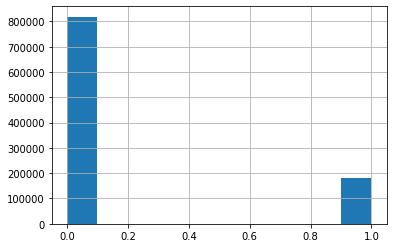

In [ ]:
df['en_cartera'].hist()
#Tener los mismos registros todos los meses?

In [ ]:
# Aplicar OHE (método 1)
#dumm = pd.get_dummies(df['Estado_Empresa_Arp_Id'])
#df = df.drop('Estado_Empresa_Arp_Id', axis = 1)
#df = df.join(dumm)
#df.head(10)

# Aplicar OHE (método 2)
#df = df.drop('Estado_Empresa_Arp_Id', 1).join(pd.get_dummies(pd.DataFrame(df['Estado_Empresa_Arp_Id'].tolist()).stack()).astype(int).sum(level=0))

In [ ]:
from sklearn.preprocessing import LabelEncoder #Codificar sólo las categóricas

LE = LabelEncoder()

columns = ['Mes_Id', 'Uen_Arp_Id', 'Uen_Arp_Id', 'Regional_Arp_Id', 'Oficina_Arp_Id', 'Tamano_Empresa_Arp_Id', 'Estado_Empresa_Arp_Id', 'Sector_Economico_Id', 'clasificacion_riesgo']

for col in columns:
  df[col] = LE.fit_transform(df[col])

In [ ]:
df.head()

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,Estado_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,1,21,0,0,4,0,0,1,20,0,1698,1.0,0,877803.0,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,5,21,0,0,4,0,0,1,13,1,886,1.0,0,1850000.0,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,4,13,2,2,4,0,0,1,4,2,240,1.0,-4,877803.0,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,5,19,2,2,4,1,0,1,14,4,1386,1.0,-4,2600000.0,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,3,20,1,1,4,1,0,1,14,0,2625,1.0,7,1000000.0,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001252 entries, 0 to 1057796
Data columns (total 29 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1001252 non-null  int64  
 1   Mes_Id                      1001252 non-null  int64  
 2   Uen_Arp_Id                  1001252 non-null  int64  
 3   Regional_Arp_Id             1001252 non-null  int64  
 4   Oficina_Arp_Id              1001252 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1001252 non-null  int64  
 6   Estado_Empresa_Arp_Id       1001252 non-null  int64  
 7   cant_siniestros             1001252 non-null  int64  
 8   cant_novedades              1001252 non-null  int64  
 9   Sector_Economico_Id         1001252 non-null  int64  
 10  clasificacion_riesgo        1001252 non-null  int64  
 11  cant_dias_cobertura         1001252 non-null  int64  
 12  Nro_afiliados               1001252 non-null  float64
 1

In [ ]:
df2 = df.copy()
X = df2.drop(['id', 'en_cartera', 'Estado_Empresa_Arp_Id'], axis=1)
y = df2['en_cartera']
X, y

(         Mes_Id  Uen_Arp_Id  ...  valor_cartera  valor_cartera_mes_ant
 0             1          21  ...            0.0                    0.0
 1             5          21  ...            0.0                    0.0
 2             4          13  ...            0.0                    0.0
 3             5          19  ...            0.0                13600.0
 4             3          20  ...         5300.0                    0.0
 ...         ...         ...  ...            ...                    ...
 1057792       3           8  ...       162000.0               162000.0
 1057793       3          21  ...            0.0                    0.0
 1057794       1          22  ...        43400.0                    0.0
 1057795       1          21  ...            0.0                    0.0
 1057796       0          20  ...            0.0                    0.0
 
 [1001252 rows x 26 columns], 0          0
 1          0
 2          0
 3          1
 4          1
           ..
 1057792    1
 105779

In [ ]:
X.shape

(1001252, 26)

In [ ]:
y.shape

(1001252,)

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split #K-Fold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

# Si se estratificara...
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
#X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler #Escalar sólo las numéricas

SS = StandardScaler()

col_names = ['cant_siniestros', 'cant_novedades', 'Nro_afiliados', 'avg_Valor_Salario', 'IBC', 'Numero_Dias_Esperados', 'Numero_Dias_Reportados', 'Numero_Total_Coberturas', 'Valor_Cotizacion_Esperada', 'Valor_Cotizacion_Reportada', 'Valor_Ingreso_Base_Liq_Esp', 'Valor_Ingreso_Base_Liq_Rep', 'Valor_Saldo', 'Valor_Tasa_Cotizacion_Esp', 'Valor_Tasa_Cotizacion_Rep', 'valor_cartera', 'valor_cartera_mes_ant', 'cant_dias_pago', 'cant_dias_cobertura']

scaler = SS.fit(X_train[col_names].values)

X_train[col_names] = scaler.transform(X_train[col_names].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
X_train

,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant
49145,1,19,2,2,0,-0.061082,-0.032058,1,4,-0.358037,-0.010319,1.320085,-0.309854,-0.047251,0.179362,0.179733,-0.032106,-0.038936,-0.038546,-0.028223,-0.028066,0.016451,0.062007,0.098032,-0.069524,-0.073044
504520,0,20,1,1,4,-0.061082,-0.042322,14,0,-0.795717,-0.010389,-0.241976,-0.309854,-0.072283,-2.906526,-2.716142,-0.042344,-0.044583,-0.044186,-0.032134,-0.031980,0.016451,-0.710282,-0.688568,-0.069524,-0.073044
832874,0,21,0,0,4,-0.061082,-0.042322,28,0,-0.661455,-0.010389,-0.144347,-0.348370,-0.071204,0.492423,0.473517,-0.042344,-0.044515,-0.044118,-0.031965,-0.031811,0.016451,-0.710282,-0.688568,-0.069524,-0.073044
105653,2,10,2,2,0,0.434788,-0.026584,17,0,0.873839,-0.010256,-0.266383,0.084742,0.004969,0.112277,0.101269,-0.026646,-0.039025,-0.039037,-0.020138,-0.020242,-0.002802,-0.658100,-0.655292,-0.069524,-0.073044
513650,4,22,3,3,0,0.930657,-0.026584,13,1,0.989896,-0.010256,-0.241976,-0.245910,-0.028198,0.216631,0.203455,-0.026646,-0.032336,-0.032455,-0.025720,-0.025828,-0.007503,0.208116,0.195086,-0.069524,-0.073044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017794,4,21,0,0,4,-0.061082,-0.040954,0,1,-0.332247,-0.010387,-0.412827,-0.309854,-0.068366,-0.163515,-0.086072,-0.040979,-0.042944,-0.042889,-0.031531,-0.031367,0.000220,0.402928,0.246848,-0.069524,-0.073044
124610,3,19,2,2,4,-0.061082,-0.041638,14,0,0.552975,-0.010388,-0.583677,-0.239237,-0.069148,0.492423,0.473517,-0.041662,-0.044384,-0.043987,-0.031644,-0.031490,0.016451,-0.710282,-0.688568,-0.058505,-0.061034
460452,3,21,0,0,4,-0.061082,-0.038217,17,1,-0.100891,-0.010378,-0.364012,-0.250810,-0.059953,0.492423,0.473517,-0.038249,-0.042987,-0.042592,-0.030207,-0.030052,0.016451,-0.459810,-0.433455,-0.069524,-0.073044
322982,1,18,2,2,4,-0.061082,-0.041638,21,2,-0.215431,-0.010388,-0.461641,-0.309854,-0.069502,0.492423,0.473517,-0.041662,-0.043620,-0.043224,-0.031699,-0.031545,0.016451,0.208116,0.246848,-0.069524,-0.073044


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801001 entries, 49145 to 1041408
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Mes_Id                      801001 non-null  int64  
 1   Uen_Arp_Id                  801001 non-null  int64  
 2   Regional_Arp_Id             801001 non-null  int64  
 3   Oficina_Arp_Id              801001 non-null  int64  
 4   Tamano_Empresa_Arp_Id       801001 non-null  int64  
 5   cant_siniestros             801001 non-null  float64
 6   cant_novedades              801001 non-null  float64
 7   Sector_Economico_Id         801001 non-null  int64  
 8   clasificacion_riesgo        801001 non-null  int64  
 9   cant_dias_cobertura         801001 non-null  float64
 10  Nro_afiliados               801001 non-null  float64
 11  cant_dias_pago              801001 non-null  float64
 12  avg_Valor_Salario           801001 non-null  float64
 13  IBC      

In [ ]:
from sklearn.preprocessing import StandardScaler #Escalar sólo las numéricas

SS = StandardScaler()

col_names = ['cant_siniestros', 'cant_novedades', 'Nro_afiliados', 'avg_Valor_Salario', 'IBC', 'Numero_Dias_Esperados', 'Numero_Dias_Reportados', 'Numero_Total_Coberturas', 'Valor_Cotizacion_Esperada', 'Valor_Cotizacion_Reportada', 'Valor_Ingreso_Base_Liq_Esp', 'Valor_Ingreso_Base_Liq_Rep', 'Valor_Saldo', 'Valor_Tasa_Cotizacion_Esp', 'Valor_Tasa_Cotizacion_Rep', 'valor_cartera', 'valor_cartera_mes_ant', 'cant_dias_pago', 'cant_dias_cobertura']

scaler = SS.fit(X_test[col_names].values)

X_test[col_names] = scaler.transform(X_test[col_names].values)

In [ ]:
# Entrenar los modelos

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
#SVM (varios kernel), otros 

clf1 = RandomForestClassifier().fit(X_train, y_train)
clf2 = GradientBoostingClassifier().fit(X_train, y_train)
clf3 = LGBMClassifier().fit(X_train, y_train)

In [ ]:
# Calcular el score de testeo

print(clf1.score(X_test, y_test))
print(clf2.score(X_test, y_test))
print(clf3.score(X_test, y_test))

0.9791960049937578
0.9791960049937578
0.9791960049937578


In [ ]:
# Calcular el score de validación

print(clf1.score(X_validate, y_validate))
print(clf2.score(X_validate, y_validate))
print(clf3.score(X_validate, y_validate))

0.18154125801490123
0.18154125801490123
0.18154125801490123


In [ ]:
# Si se estratificara...
#from sklearn.model_selection import ShuffleSplit

#st = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#st = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

##st = KFold(n_splits=10, n_folds=5, shuffle=True, random_state=None)

In [ ]:
# Si se estratificara...
#from sklearn.model_selection import cross_val_score

#scores1 = cross_val_score(clf1, X, y, cv=5)
#print("Score de validación 1: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

#scores2 = cross_val_score(clf2, X, y, cv=5)
#print("Score de validación 2: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

#scores3 = cross_val_score(clf3, X, y, cv=5)
#print("Score de validación 2: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

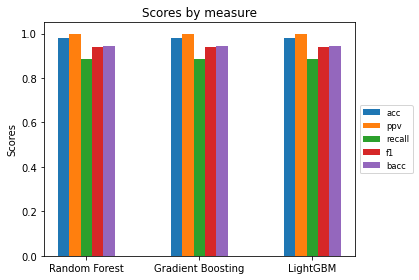

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

labels = ['Random Forest', 'Gradient Boosting', 'LightGBM']
measures = ['acc','ppv','recall','f1','bacc']
Performance = []
Performance.append([accuracy_score(y_test,clf1.predict(X_test)), accuracy_score(y_test,clf2.predict(X_test)), accuracy_score(y_test,clf3.predict(X_test))])
Performance.append([precision_score(y_test,clf1.predict(X_test)), precision_score(y_test,clf2.predict(X_test)), precision_score(y_test,clf3.predict(X_test))])
Performance.append([recall_score(y_test,clf1.predict(X_test)), recall_score(y_test,clf2.predict(X_test)), recall_score(y_test,clf3.predict(X_test))])
Performance.append([f1_score(y_test,clf1.predict(X_test)), f1_score(y_test,clf2.predict(X_test)), f1_score(y_test,clf3.predict(X_test))])
Performance.append([balanced_accuracy_score(y_test,clf1.predict(X_test)), balanced_accuracy_score(y_test,clf2.predict(X_test)), balanced_accuracy_score(y_test,clf3.predict(X_test))])

x = np.arange(len(labels))*2  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width+0.3 -0.7, Performance[i],width, label=measures[i])
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1,loc='center right', fontsize='small',bbox_to_anchor=(1.2, 0.5))
fig.tight_layout()
plt.show()

[[1.         0.        ]
 [0.11474687 0.88525313]]


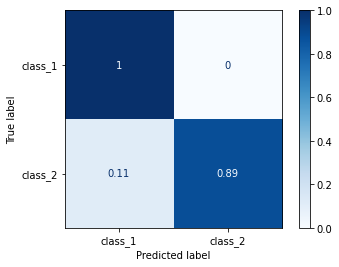

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf1, X_test, y_test, display_labels=['class_1','class_2'], cmap=plt.cm.Blues, normalize='true')

print(disp.confusion_matrix)

plt.show()

[[0. 1.]
 [0. 1.]]


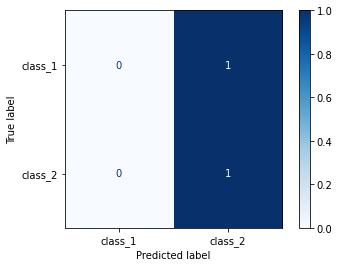

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf1, X_validate, y_validate, display_labels=['class_1','class_2'], cmap=plt.cm.Blues, normalize='true')

print(disp.confusion_matrix)

plt.show()

[[1.         0.        ]
 [0.11474687 0.88525313]]


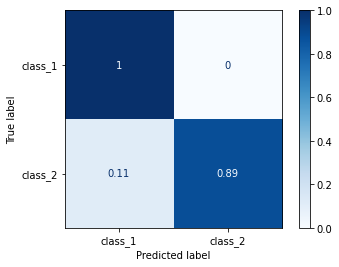

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf2, X_test, y_test, display_labels=['class_1','class_2'], cmap=plt.cm.Blues, normalize='true')

print(disp.confusion_matrix)

plt.show()

[[1.         0.        ]
 [0.11474687 0.88525313]]


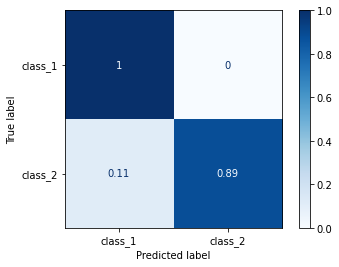

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf3, X_test, y_test, display_labels=['class_1','class_2'], cmap=plt.cm.Blues, normalize='true')

print(disp.confusion_matrix)

plt.show()